# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import sklearn

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
np.arange (1,7,1)
lançamentos = []
for i in range(10):
    lançamentos.append(random.choice(np.arange(1,7,1)))

pd.DataFrame(lançamentos)

,0
0,1
1,1
2,2
3,1
4,4
5,5
6,2
7,1
8,3
9,6


#### 2.- Plot the results sorted by value.

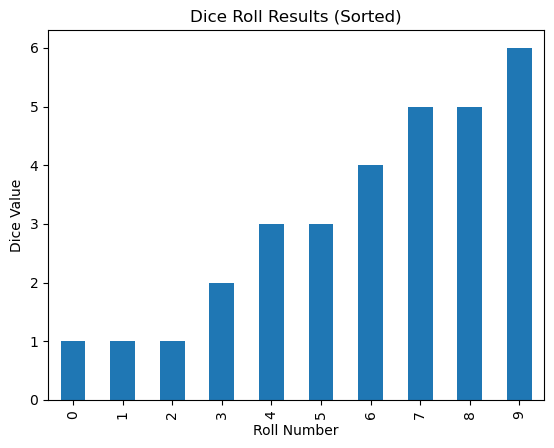

In [3]:
np.arange (1,7,1)
lançamentos = []
for i in range(10):
    lançamentos.append(random.choice(np.arange(1,7,1)))

pd.DataFrame(lançamentos)


sorted_lançamentos = sorted(lançamentos)


df = pd.DataFrame(sorted_lançamentos, columns = ['Roll']) 
df.plot(kind = 'bar', legend = None)
plt.xlabel('Roll Number')
plt.ylabel('Dice Value')
plt.title('Dice Roll Results (Sorted)')

plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

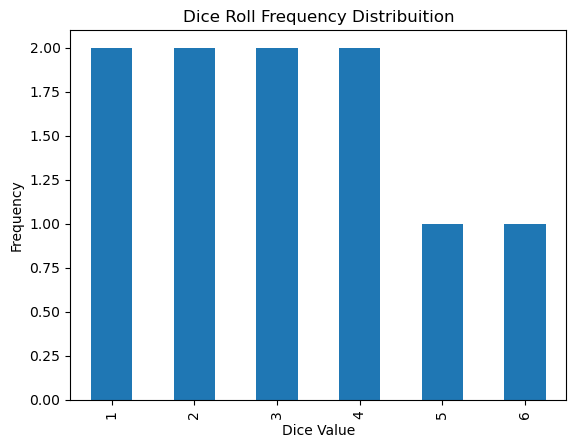

In [4]:
np.arange (1,7,1)
lançamentos = []
for i in range(10):
    lançamentos.append(random.choice(np.arange(1,7,1)))

pd.DataFrame(lançamentos)


sorted_lançamentos = sorted(lançamentos)


df = pd.DataFrame(sorted_lançamentos, columns = ['Roll']) 
frequency_distribuition = df['Roll'].value_counts().sort_index()
frequency_distribuition.plot (kind='bar')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice Roll Frequency Distribuition')

plt.show()

In [ ]:
"""
In comparison to the previous plot, which displayed the sorted dice roll values, i think this plot provides a clearer picture 
of how frequently each dice value occurred in the 10 rolls.

"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [5]:
def calculate_mean(lançamentos):
    total = 0
    count = 0

    for value in lançamentos:
        total += value
        count += 1

    if count == 0:
        return None

    mean = total / count
    print (mean)



#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

Mean: 2.9


C:\Users\David Santos\AppData\Local\Temp\ipykernel_14504\4223867082.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for dice_value, frequency in frequency_distribuition.iteritems():


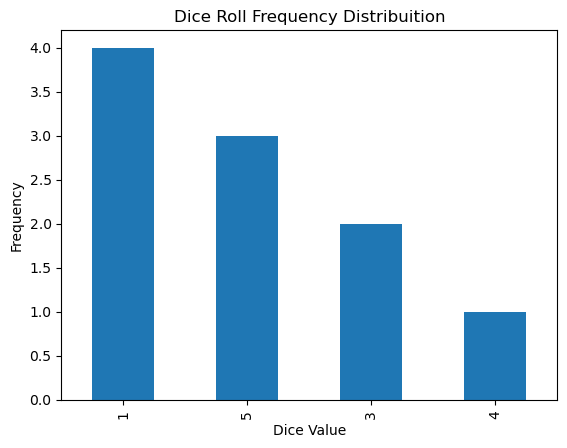

In [11]:
np.random.seed(42) 
lançamentos = []
for i in range (10): 
    lançamentos.append(random.choice(np.arange(1,7,1)))

df = pd.DataFrame(lançamentos, columns = ['Roll'])

sorted_lançamentos = sorted(lançamentos)
frequency_distribuition = pd.Series(sorted_lançamentos).value_counts()

#mean using the frequency distribuition

sum_products = 0 
sum_frequencies = 0 

for dice_value, frequency in frequency_distribuition.iteritems(): 
    sum_products += dice_value * frequency 
    sum_frequencies += frequency 

mean = sum_products / sum_frequencies 
print("Mean:", mean)

frequency_distribuition.plot(kind='bar')
plt.xlabel ('Dice Value')
plt.ylabel ('Frequency')
plt.title ('Dice Roll Frequency Distribuition')

plt.show()

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [16]:
def calculate_median(data):
    sorted_data = sorted(data)

    length = len(sorted_data) 
 
if length % 2 == 1:
    median = sorted.data[length // 2]
else: 
    middle_right = sorted_data [length // 2]
    middle_left = sorted_data [length // 2-1]
    median = (middle_left + middle_right) / 2 

return median 

NameError: name 'length' is not defined

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
def calculate_quartiles (data):
    sorted_data = sorted(data)
    length = len(sorted_data)

    q1_index = length // 4
    q2_index = length // 2
    q3_index = (length * 3) // 4

    if length % 2 == 1:
        q1 = calculate_median(sorted_data[:q1_index])
        q2 = calculate_median(sorted_data)
        q3 = calculate_median(sorted_data[q3_index + 1:])
    else: 
        q1 = calculate_median(sorted_data[:q1_index])
        q2 = calculate_median(sorted_data)
        q3 = calculate_median(sorted_data[q3_index:])

return q1, q2, q3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [28]:
roll_dice = pd.read_csv('C:\\Users\\David Santos\\Desktop\\Labs IronHack\\8 - Descriptive-Stats\\data\\roll_the_dice_hundred.csv')
roll_dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [33]:
roll_dice['value'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

In [30]:
len(roll_dice) / 6 

16.666666666666668

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [38]:
dice_rolls = roll_dice['value']

mean_hundred_rolls = dice_rolls.mean() 

print ("Mean (hundred rolls):", mean_hundred_rolls)

Mean (hundred rolls): 3.74


#### 3.- Now, calculate the frequency distribution.


In [60]:
dice_rolls = roll_dice['value']

frequency_distribution = dice_rolls.value_counts().sort_index() 

print("Frequency Distribution:")
print( frequency_distribution)


Frequency Distribution:
1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

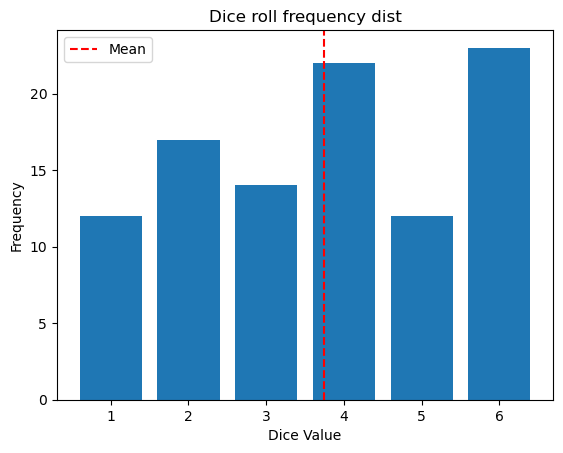

In [44]:
dice_rolls = roll_dice['value']

frequency_distribution = dice_rolls.value_counts().sort_index()

#histogram

plt.bar(frequency_distribution.index, frequency_distribution.values)
plt.xlabel('Dice Value')
plt.ylabel('Frequency')
plt.title('Dice roll frequency dist')

mean_hundred_rolls = dice_rolls.mean() 

plt.axvline(x=mean_hundred_rolls, color = 'red', linestyle = '--', label = 'Mean' )

plt.legend() 

plt.show() 

In [ ]:
"""
The shape provide insights into the distributions characteristics. 
Connecting the mean value to the histogram allows you to see where it falls within the distribution.
I also think it can provide insights of the distribution of the data.

"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [45]:
roll_dice2 = pd.read_csv('C:\\Users\\David Santos\\Desktop\\Labs IronHack\\8 - Descriptive-Stats\\data\\roll_the_dice_thousand.csv')

In [46]:
roll_dice2['value'].value_counts()

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64

In [47]:
len(roll_dice2) / 6 

166.66666666666666

In [48]:
dice_rolls2 = roll_dice2['value']

frequency_distribution = dice_rolls2.value_counts().sort_index() 

print("Frequency Distribution:")
print( frequency_distribution)


Frequency Distribution:
1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [59]:
population1 = pd.read_csv('C:\\Users\\David Santos\\Desktop\\Labs IronHack\\8 - Descriptive-Stats\\data\\ages_population.csv')

population1

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [61]:
freqpop1 = population1['observation']

frequency_distribution = freqpop1.value_counts().sort_index() 

print("Frequency Distribution:")
print( frequency_distribution)

Frequency Distribution:
1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [56]:
population1['observation'].value_counts()

mean1 = population1['observation']

mean_population = mean1.mean() 

print("Mean Population:", mean_population)

Mean Population: 36.56


In [57]:
mean1 = population1['observation']

standard_deviation_population = mean1.std() 

print("Standard Deviation Population:", standard_deviation_population )

Standard Deviation Population: 12.816499625976762


#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [58]:
population2 = pd.read_csv('C:\\Users\\David Santos\\Desktop\\Labs IronHack\\8 - Descriptive-Stats\\data\\ages_population2.csv')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Frequency Distribution:
19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64


Text(0.5, 1.0, 'Observation Frequency Distribution')

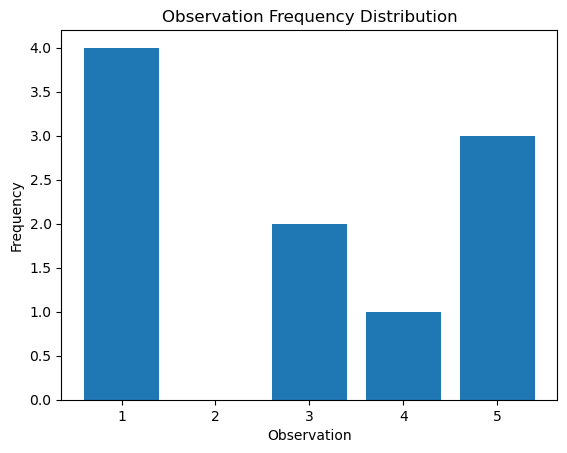

In [65]:
freqpop2 = population2['observation']

frequency_distribution = freqpop2.value_counts().sort_index() 

print("Frequency Distribution:")
print( frequency_distribution)

plt.bar(frequency_distribuition.index, frequency_distribuition.values)
plt.xlabel('Observation')
plt.ylabel('Frequency')
plt.title('Observation Frequency Distribution')
# the freq dist on the frist was between 1 and 2, and now it has more values. 


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [63]:
population2['observation'].value_counts()

mean2 = population2['observation']

mean_population2 = mean2.mean() 

print("Mean Population:", mean_population2)

Mean Population: 27.155


In [64]:
mean2 = population2['observation']

standard_deviation_population2 = mean2.std() 

print("Standard Deviation Population:", standard_deviation_population2 )

Standard Deviation Population: 2.969813932689186


In [ ]:
"""
The mean fall from 36,56 to 27,155 and the std dev from 12,8 to 2,9
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

Frequency Distribution:
1.0     1
2.0     2
4.0     2
5.0     1
7.0     1
       ..
73.0    6
74.0    6
75.0    2
76.0    1
77.0    2
Name: observation, Length: 75, dtype: int64


Text(0.5, 1.0, 'Observation Frequency Distribution')

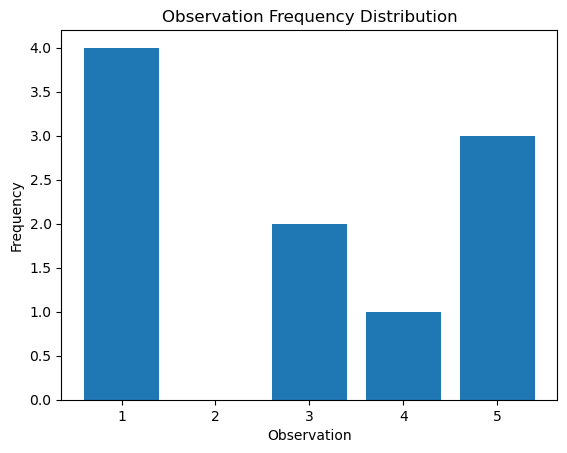

In [70]:
population3 = pd.read_csv('C:\\Users\\David Santos\\Desktop\\Labs IronHack\\8 - Descriptive-Stats\\data\\ages_population3.csv')

freqpop3 = population3['observation']

frequency_distribution = freqpop3.value_counts().sort_index() 

print("Frequency Distribution:")
print( frequency_distribution)

plt.bar(frequency_distribuition.index, frequency_distribuition.values)
plt.xlabel('Observation')
plt.ylabel('Frequency')
plt.title('Observation Frequency Distribution')


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [71]:
population3['observation'].value_counts()

mean3 = population3['observation']

mean_population3 = mean3.mean() 

print("Mean Population:", mean_population3)

Mean Population: 41.989


In [72]:
mean3 = population3['observation']

standard_deviation_population3 = mean3.std() 

print("Standard Deviation Population:", standard_deviation_population3 )

Standard Deviation Population: 16.144705959865934


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [75]:
observation3 = population3['observation']

quartile_1 = observation3.quantile(0.25)
quartile_2 = observation3.quantile(0.5)
quartile_3 = observation3.quantile(0.75)
quartile_4 = observation3.quantile(1)

print("First Quartile (Q1):", quartile_1)

print("Second Quartile (Q2 / Median):", quartile_2)

print("Third Quartile (Q3):", quartile_3)

print("Fourth Quartile (Q4):", quartile_4)

First Quartile (Q1): 30.0
Second Quartile (Q2 / Median): 40.0
Third Quartile (Q3): 53.0
Fourth Quartile (Q4): 77.0


In [76]:
mean_population3 = observation3.mean() 
median_population3 = observation3.median()

difference = median_population3 - mean_population3 

print("Difference between median and mean:", difference )

Difference between median and mean: -1.9889999999999972


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [77]:
quartile_1 = observation3.quantile(0.25)
quartile_2 = observation3.quantile(0.5)
quartile_3 = observation3.quantile(0.75)

percentile_10 = observation3.quantile(0.1)
percentile_90 = observation3.quantile(0.9)

minimum = observation3.min() 
maximum = observation3.max() 


print("Quartiles:")
print("Q1:", quartile_1)
print("Q2 (Median):", quartile_2)
print("Q3:", quartile_3)
print("")

print("Additional Percentiles:")
print("10th percentile (P10):", percentile_10)
print("90th percentile (P90):", percentile_90)

print("Minimum Value:", minimum)
print("Maximum Value:", maximum)


Quartiles:
Q1: 30.0
Q2 (Median): 40.0
Q3: 53.0

Additional Percentiles:
10th percentile (P10): 22.0
90th percentile (P90): 67.0
Minimum Value: 1.0
Maximum Value: 77.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""